In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datafreq = pd.read_csv('DATAFREQ.csv', sep=';')
datatemp = pd.read_csv('DATA TEMP_081020.csv', sep=';')
datadiff = pd.read_csv('DATADIFF.csv', sep=';')
y = datadiff.iloc[499:, 5]
y = y.values.reshape(-1, 1)
X1 = datafreq.iloc[498:1558, 2:6]
X2 = datatemp.iloc[498:1558, 2:6]
X = pd.concat([X1,X2], axis=1)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
sc = StandardScaler()
X = sc.fit_transform(X)
transformer = MaxAbsScaler().fit(y)
y = transformer.transform(y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
classifier = Sequential()

classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 8))
classifier.add(Dropout(rate = 0.1))

classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.add(Dropout(rate = 0.1))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))

classifier.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), 
                   metrics = [tf.keras.metrics.RootMeanSquaredError()])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)

In [7]:
y_pred = classifier.predict(X_test)
y_ovr = classifier.predict(X)
y_ovr = transformer.inverse_transform(y_ovr)

In [8]:
datatemparray = datatemp.iloc[499:, 5].values
x = []
y_cum = []
y_cumpred = [datatemparray[0]]
for i in range(0, X.shape[0]):
    x.append([i])
    y_cum.append(datatemparray[i])
for i in range(0, X.shape[0]-1):
    y_cumpred.append(y_cumpred[i] + y_ovr[i])

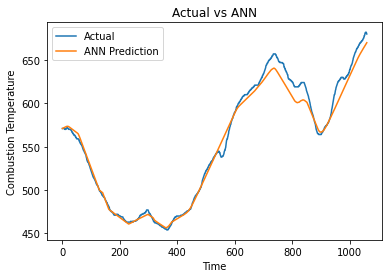

In [9]:
plt.plot(x, y_cum, label = "Actual")
plt.plot(x, y_cumpred, label = "ANN Prediction")
plt.xlabel('Time')
plt.ylabel('Combustion Temperature')
plt.title('Actual vs ANN')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import r2_score
print(r2_score(y_cum, y_cumpred))

0.9840304241532913


In [6]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = Sequential()
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 8))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'tanh'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))
    model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model

my_model = KerasRegressor(build_fn = base_model)
my_model.fit(X_train, y_train, batch_size = 10, epochs = 1000)

perm = PermutationImportance(my_model, random_state=0).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = ["Discharge Blower", "Primary Blower", "Vibrating Grate", "Screw Feeder",
                                        "Drying Temp", "Pyrolysis Temp", "Reduction Temp", "Combustion Temp"])

C:\Users\hanif\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\hanif\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Epoch 1/1000
848/848 [==============================] - 1s 850us/step - loss: 0.0731 - root_mean_squared_error: 0.2795
Epoch 2/1000
848/848 [==============================] - 0s 262us/step - loss: 0.0632 - root_mean_squared_error: 0.2624
Epoch 3/1000
848/848 [==============================] - 0s 255us/step - loss: 0.0589 - root_mean_squared_error: 0.2571
Epoch 4/1000
848/848 [==============================] - 0s 265us/step - loss: 0.0587 - root_mean_squared_error: 0.2536
Epoch 5/1000
848/848 [==============================] - 0s 266us/step - loss: 0.0586 - root_mean_squared_error: 0.2512
Epoch 6/1000
848/848 [==============================] - 0s 260us/step - loss: 0.0584 - root_mean_squared_error: 0.2497
Epoch 7/1000
848/848 [==============================] - 0s 248us/step - loss: 0.0581 - root_mean_squared_error: 0.2482
Epoch 8/1000
848/848 [==============================] - 0s 256us/step - loss: 0.0581 - root_mean_squared_error: 0.2472
Epoch 9/1000
848/848 [==========================

848/848 [==============================] - 0s 272us/step - loss: 0.0532 - root_mean_squared_error: 0.2374
Epoch 138/1000
848/848 [==============================] - 0s 255us/step - loss: 0.0522 - root_mean_squared_error: 0.2373
Epoch 139/1000
848/848 [==============================] - 0s 249us/step - loss: 0.0525 - root_mean_squared_error: 0.2373
Epoch 140/1000
848/848 [==============================] - 0s 246us/step - loss: 0.0522 - root_mean_squared_error: 0.2372
Epoch 141/1000
848/848 [==============================] - 0s 263us/step - loss: 0.0520 - root_mean_squared_error: 0.2371
Epoch 142/1000
848/848 [==============================] - 0s 261us/step - loss: 0.0514 - root_mean_squared_error: 0.2371
Epoch 143/1000
848/848 [==============================] - 0s 250us/step - loss: 0.0525 - root_mean_squared_error: 0.2370
Epoch 144/1000
848/848 [==============================] - 0s 252us/step - loss: 0.0521 - root_mean_squared_error: 0.2370
Epoch 145/1000
848/848 [=======================

848/848 [==============================] - 0s 252us/step - loss: 0.0479 - root_mean_squared_error: 0.2300
Epoch 272/1000
848/848 [==============================] - 0s 251us/step - loss: 0.0476 - root_mean_squared_error: 0.2300
Epoch 273/1000
848/848 [==============================] - 0s 274us/step - loss: 0.0474 - root_mean_squared_error: 0.2300
Epoch 274/1000
848/848 [==============================] - 0s 248us/step - loss: 0.0479 - root_mean_squared_error: 0.2299
Epoch 275/1000
848/848 [==============================] - 0s 267us/step - loss: 0.0477 - root_mean_squared_error: 0.2299
Epoch 276/1000
848/848 [==============================] - 0s 340us/step - loss: 0.0474 - root_mean_squared_error: 0.2299
Epoch 277/1000
848/848 [==============================] - 0s 365us/step - loss: 0.0468 - root_mean_squared_error: 0.2298
Epoch 278/1000
848/848 [==============================] - 0s 275us/step - loss: 0.0469 - root_mean_squared_error: 0.2298
Epoch 279/1000
848/848 [=======================

848/848 [==============================] - 0s 266us/step - loss: 0.0474 - root_mean_squared_error: 0.2261
Epoch 406/1000
848/848 [==============================] - 0s 253us/step - loss: 0.0469 - root_mean_squared_error: 0.2261
Epoch 407/1000
848/848 [==============================] - 0s 261us/step - loss: 0.0472 - root_mean_squared_error: 0.2261
Epoch 408/1000
848/848 [==============================] - 0s 258us/step - loss: 0.0482 - root_mean_squared_error: 0.2261
Epoch 409/1000
848/848 [==============================] - 0s 252us/step - loss: 0.0465 - root_mean_squared_error: 0.2260
Epoch 410/1000
848/848 [==============================] - 0s 262us/step - loss: 0.0468 - root_mean_squared_error: 0.2260
Epoch 411/1000
848/848 [==============================] - 0s 259us/step - loss: 0.0476 - root_mean_squared_error: 0.2260
Epoch 412/1000
848/848 [==============================] - 0s 259us/step - loss: 0.0469 - root_mean_squared_error: 0.2260
Epoch 413/1000
848/848 [=======================

848/848 [==============================] - 0s 247us/step - loss: 0.0467 - root_mean_squared_error: 0.2238
Epoch 540/1000
848/848 [==============================] - 0s 260us/step - loss: 0.0455 - root_mean_squared_error: 0.2238
Epoch 541/1000
848/848 [==============================] - 0s 281us/step - loss: 0.0468 - root_mean_squared_error: 0.2238
Epoch 542/1000
848/848 [==============================] - 0s 250us/step - loss: 0.0467 - root_mean_squared_error: 0.2238
Epoch 543/1000
848/848 [==============================] - 0s 267us/step - loss: 0.0465 - root_mean_squared_error: 0.2238
Epoch 544/1000
848/848 [==============================] - 0s 250us/step - loss: 0.0464 - root_mean_squared_error: 0.2237
Epoch 545/1000
848/848 [==============================] - 0s 255us/step - loss: 0.0468 - root_mean_squared_error: 0.2237
Epoch 546/1000
848/848 [==============================] - 0s 246us/step - loss: 0.0470 - root_mean_squared_error: 0.2237
Epoch 547/1000
848/848 [=======================

848/848 [==============================] - 0s 255us/step - loss: 0.0472 - root_mean_squared_error: 0.2222
Epoch 674/1000
848/848 [==============================] - 0s 255us/step - loss: 0.0463 - root_mean_squared_error: 0.2222
Epoch 675/1000
848/848 [==============================] - 0s 293us/step - loss: 0.0452 - root_mean_squared_error: 0.2222
Epoch 676/1000
848/848 [==============================] - 0s 305us/step - loss: 0.0461 - root_mean_squared_error: 0.2222
Epoch 677/1000
848/848 [==============================] - 0s 258us/step - loss: 0.0467 - root_mean_squared_error: 0.2222
Epoch 678/1000
848/848 [==============================] - 0s 254us/step - loss: 0.0463 - root_mean_squared_error: 0.2222
Epoch 679/1000
848/848 [==============================] - 0s 253us/step - loss: 0.0468 - root_mean_squared_error: 0.2221
Epoch 680/1000
848/848 [==============================] - 0s 263us/step - loss: 0.0460 - root_mean_squared_error: 0.2221
Epoch 681/1000
848/848 [=======================

848/848 [==============================] - 0s 246us/step - loss: 0.0465 - root_mean_squared_error: 0.2210
Epoch 808/1000
848/848 [==============================] - 0s 247us/step - loss: 0.0466 - root_mean_squared_error: 0.2210
Epoch 809/1000
848/848 [==============================] - 0s 270us/step - loss: 0.0459 - root_mean_squared_error: 0.2210
Epoch 810/1000
848/848 [==============================] - 0s 258us/step - loss: 0.0452 - root_mean_squared_error: 0.2210
Epoch 811/1000
848/848 [==============================] - 0s 259us/step - loss: 0.0464 - root_mean_squared_error: 0.2210
Epoch 812/1000
848/848 [==============================] - 0s 249us/step - loss: 0.0456 - root_mean_squared_error: 0.2210
Epoch 813/1000
848/848 [==============================] - 0s 259us/step - loss: 0.0467 - root_mean_squared_error: 0.2209
Epoch 814/1000
848/848 [==============================] - 0s 261us/step - loss: 0.0446 - root_mean_squared_error: 0.2209
Epoch 815/1000
848/848 [=======================

848/848 [==============================] - 0s 243us/step - loss: 0.0456 - root_mean_squared_error: 0.2200
Epoch 942/1000
848/848 [==============================] - 0s 265us/step - loss: 0.0458 - root_mean_squared_error: 0.2200
Epoch 943/1000
848/848 [==============================] - 0s 256us/step - loss: 0.0442 - root_mean_squared_error: 0.2200
Epoch 944/1000
848/848 [==============================] - 0s 262us/step - loss: 0.0449 - root_mean_squared_error: 0.2200
Epoch 945/1000
848/848 [==============================] - 0s 256us/step - loss: 0.0438 - root_mean_squared_error: 0.2199
Epoch 946/1000
848/848 [==============================] - 0s 256us/step - loss: 0.0451 - root_mean_squared_error: 0.2199
Epoch 947/1000
848/848 [==============================] - 0s 257us/step - loss: 0.0456 - root_mean_squared_error: 0.2199
Epoch 948/1000
848/848 [==============================] - 0s 252us/step - loss: 0.0451 - root_mean_squared_error: 0.2199
Epoch 949/1000
848/848 [=======================

Weight,Feature
0.0648 ± 0.0155,Drying Temp
0.0407 ± 0.0139,Primary Blower
0.0272 ± 0.0069,Reduction Temp
0.0229 ± 0.0027,Screw Feeder
0.0137 ± 0.0123,Discharge Blower
0.0108 ± 0.0027,Pyrolysis Temp
0.0026 ± 0.0018,Combustion Temp
0.0017 ± 0.0010,Vibrating Grate
